In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [9]:

X, y = make_classification(n_samples=500, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

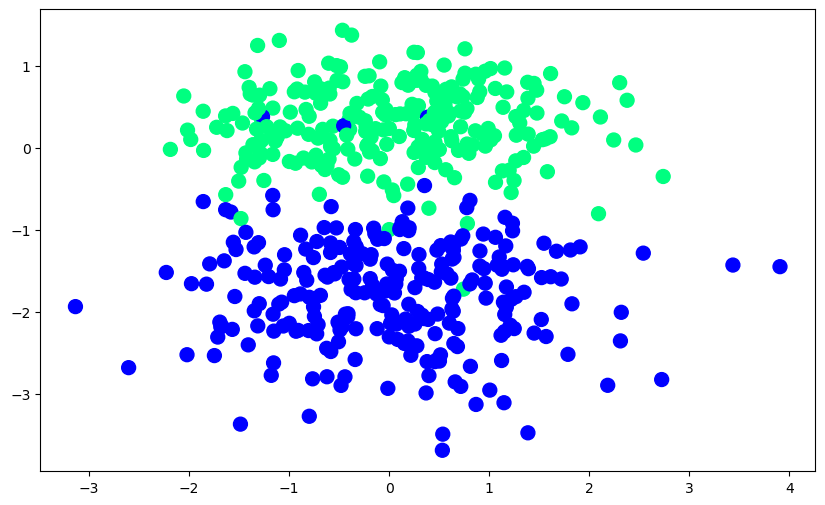

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [24]:
class logisticRegression:
    def __init__(self,alpha,epoch):
        self.alpha = alpha
        self.epoch = epoch
        self.weight = None
    def fit(self,X_train,y_train):
        X_train = np.hstack((np.ones( (X_train.shape[0] , 1)) , X_train))
        self.weight = np.ones(X_train.shape[1])
        for i in range(self.epoch):
            y_hat = logisticRegression.sigmoid(np.dot(X_train , self.weight))
            slope = -1 * np.dot((y_train - y_hat) , X_train) / X_train.shape[0]
            self.weight = self.weight - self.alpha * slope
            
    @classmethod
    def sigmoid(cls,z):
        return 1 / (1 + np.exp(-z))

    def predict(self,X_test):
        X_test = np.hstack((np.ones( (X_test.shape[0] , 1)) , X_test))
        result = logisticRegression.sigmoid(np.dot(X_test , self.weight))
        return np.where(result >= 0.5 , 1 , 0)

In [93]:
model1 = logisticRegression(0.1 , 5000)

In [94]:
model1.fit(X_train , y_train)

In [95]:
pred1 = model1.predict(X_test)

In [96]:
print("Accuracy : " , accuracy_score(y_test , pred1))

Accuracy :  0.97


In [97]:
m = - 0.27752184 / 2.20585423
c = - 1.163612 / 2.20585423

In [98]:
x_input = np.linspace(-3,3,500)
y_input= m*x_input + c

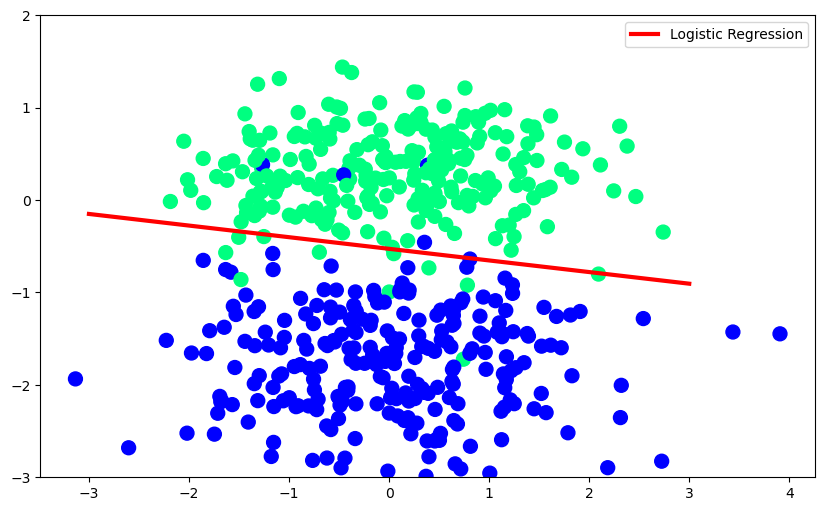

In [100]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3 , label = "Logistic Regression")
plt.legend()
plt.ylim(-3,2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [61]:


dict = {'f1':X_test[:,0] , 'f2':X_test[:,1] , 'output':y_test}

In [62]:
df = pd.DataFrame(dict)

<Axes: xlabel='f1', ylabel='f2'>

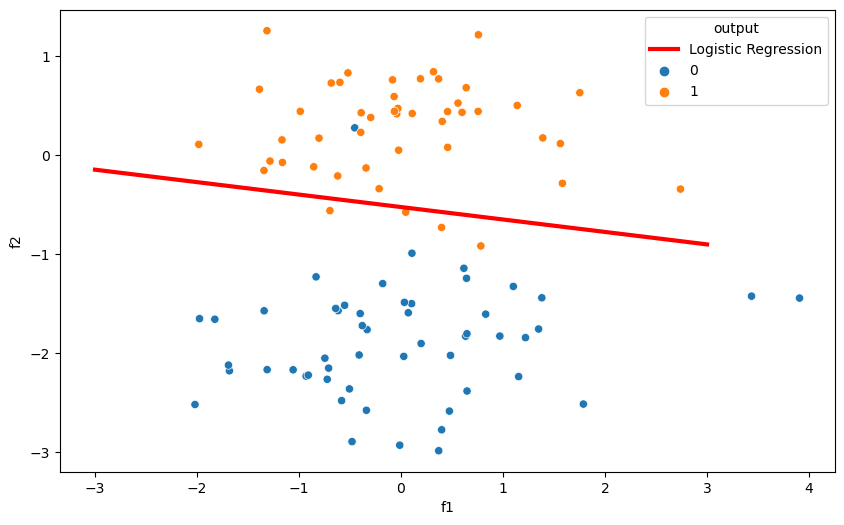

In [101]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3 , label = "Logistic Regression")
sns.scatterplot(x = 'f1' , y = 'f2' , data = df , hue = 'output')

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model2 = LogisticRegression()

In [67]:
model2.fit(X_train,y_train)

LogisticRegression()

In [68]:
pred2 = model2.predict(X_test)

In [102]:
accuracy_score(y_test , pred2)

0.97

In [103]:
m1 = -(model2.coef_[0][0]/model2.coef_[0][1])
b1 = -(model2.intercept_/model2.coef_[0][1])

In [81]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1

In [82]:
y_input1.shape

(100,)

(-3.0, 2.0)

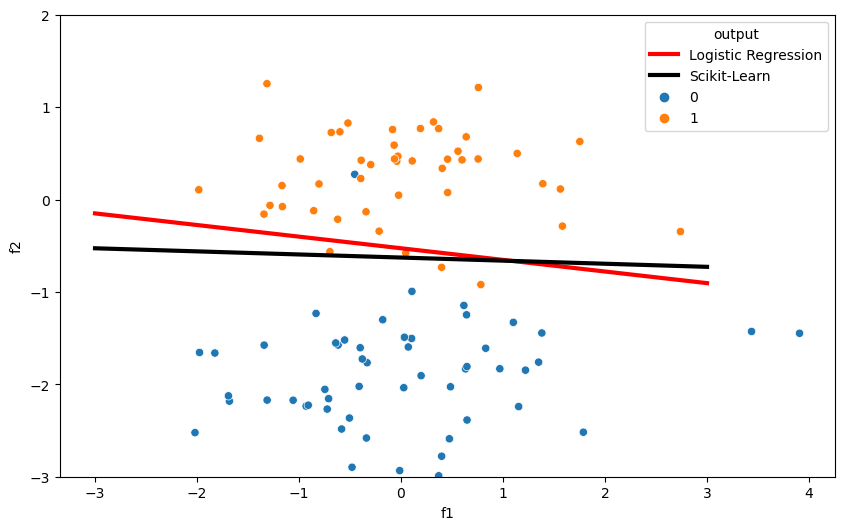

In [104]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3 , label = "Logistic Regression")
plt.plot(x_input1,y_input1,color='black',linewidth=3 , label = "Scikit-Learn")

sns.scatterplot(x = 'f1' , y = 'f2' , data = df , hue = 'output')
plt.ylim(-3,2)